In [1]:
# import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('500_Person_Gender_Height_Weight_Index.csv')
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [3]:
# Let's get weight data first by dropping height column
weight_data = data.drop(['Height'], axis=1)
weight_data

,Gender,Weight,Index
0,Male,96,4
1,Male,87,2
2,Female,110,4
3,Female,104,3
4,Male,61,3
...,...,...,...
495,Female,153,5
496,Female,121,4
497,Female,136,5
498,Male,95,5


#1. sample mean, sample median, and sample mode

In [4]:
weight = weight_data['Weight']

# Sample mean
print(f'Sample Mean = {np.mean(weight)}')

Sample Mean = 106.0


In [5]:
# Sample median
print(f'Sample Median = {np.median(weight.sort_values(ascending = True))}')

Sample Median = 106.0


In [6]:
# Sample mode

# First, let's find the highest frequency
highest_freq = max(weight.value_counts())

# Then we print all weight values that have same frequency with highest_freq
print(weight.value_counts()[weight.value_counts() == highest_freq])

Weight
104    9
80     9
50     9
Name: count, dtype: int64


#2. Find the range, sample variance, and sample standard deviation.

In [7]:
# Range

print(f'Range = {max(weight) - min(weight)}')

Range = 110


In [8]:
# Sample Variance

avg = np.mean(weight)
sigma = sum([(weight[i] - avg)**2 for i in range(len(weight))])
variance = sigma / (len(weight) - 1)
print('Variance =',variance)

Variance = 1048.633266533066


In [9]:
# Sample standard deviation

print('Sample Standard Deviation =',variance**0.5)

Sample Standard Deviation = 32.38260746964435


I got 110 for the Range. it's mean that I have large enough range for a weight data.
For the variance I got the result about 1048.63 and standard deviation about 32.38

#3. What is the differences between variance and standard deviation?

| Basis for Comparison | Variance | Standard Deviation |
|---------------------|----------|-------------------|
| Meaning | Variance is a numerical value that describes the variability of observations from its arithmetic mean. | Standard deviation is a measure of dispersion of observations within a data set. |
| What is it? | It is the average of squared deviations. | It is the root mean square deviation. |
| Labelled as | Sigma-squared (σ²) | Sigma (σ) |
| Expressed in | Squared units | Same units as the values in the data set |
| Indicates | How far individuals in a group are spread out. | How much observations of a data set differ from its mean. |


# 4. Find the 15th percentile and 90th percentile. What's the meaning of them?

In [10]:
# Let's sort the data first
weight = weight.sort_values(ascending = True).reset_index(drop = True)
print(weight)

0       50
1       50
2       50
3       50
4       50
      ... 
495    160
496    160
497    160
498    160
499    160
Name: Weight, Length: 500, dtype: int64


In [11]:
# 15th percentile

n = len(weight)
idx = n * 0.15 # idx = 75.0
p15 = (weight[idx] + weight[idx + 1]) / 2
print('15th percentile =',p15)

15th percentile = 67.0


In [12]:
# 90th percentile

idx = n * 0.9 # idx = 450.0
p90 = (weight[idx] + weight[idx + 1]) / 2
print('90th percentile =',p90)

90th percentile = 151.0


In sorted data, percentiles have meaning about the rank of a data. 15th percentile means the rank of the 15% of data. If the calculation to find the percentile is not whole number, then we should round up the result. Otherwise, we don't have to.
The 90th percentile means the rank of 90% of the data.

# 5. Inter Quartile Range (IQR), Reasonable Lower Boundary (RLB), Reasonable Upper Boundary (RUB). Explain their benefits!

In [ ]:
# IQR is a difference between Q3 and Q1

idx = n * 0.25 
q1 = (weight[idx] + weight[idx + 1]) / 2

idx = n * 0.75 
q3 = (weight[idx] + weight[idx + 1]) / 2

IQR = q3 - q1
print('IQR =',IQR)

IQR = 56.0


In [ ]:
# RLB

RLB = q1 - 1.5*IQR    #The factor 1.5 defines how far is “far enough” to be considered an outlier.
print('RLB =',RLB)

# RUB

RUB = q3 + 1.5*IQR
print('RUB =',RUB)

RLB = -4.0
RUB = 220.0


The benefit of IQR is to find RUB and RLB. And they will be useful to detect outliers in our data.

#6. Are there any outliers in the data? Whether outliers can affect your calculations in item number 1 to.d. 2? Give a reason.

To check are there any outliers, we need to find how many data greater than RUB and how many less than RLB.

In [15]:
total_outliers = len(weight[weight > RUB]) + len(weight[weight < RLB])
print(f'We have {total_outliers} outliers in our data')

We have 0 outliers in our data


Outliers will affect our mean and make our calculations less accurate. Also, the outliers will affect the variance, standard deviation, and range of our data. If there are a few outliers, we can drop the outliers from our data.

#7. Make a box plot. What information you get from it?

/tmp/ipython-input-3419306220.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data = weight_data, y = weight_data['Weight'], x = weight_data['Gender'], palette = 'pastel')


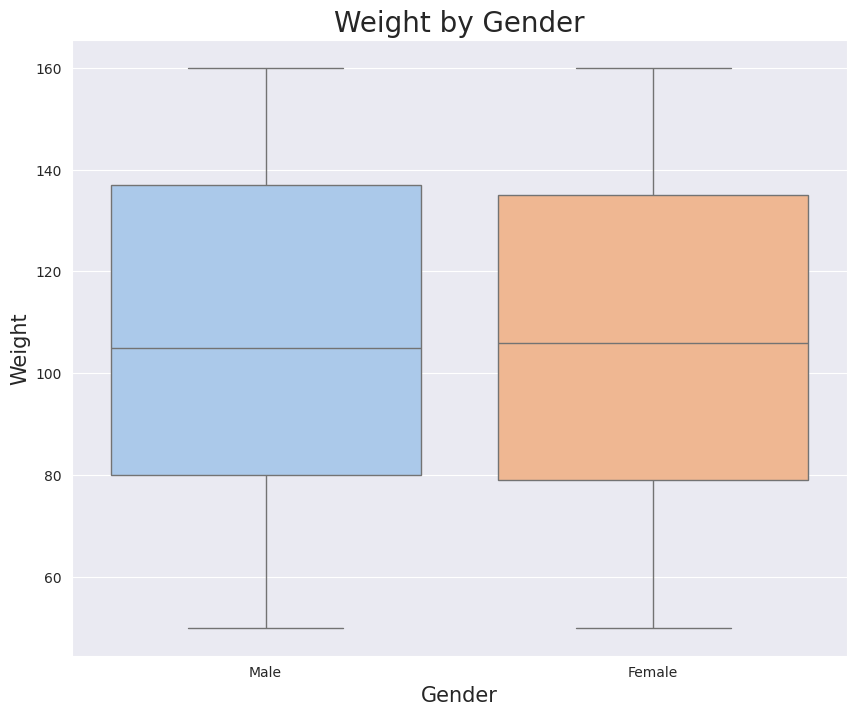

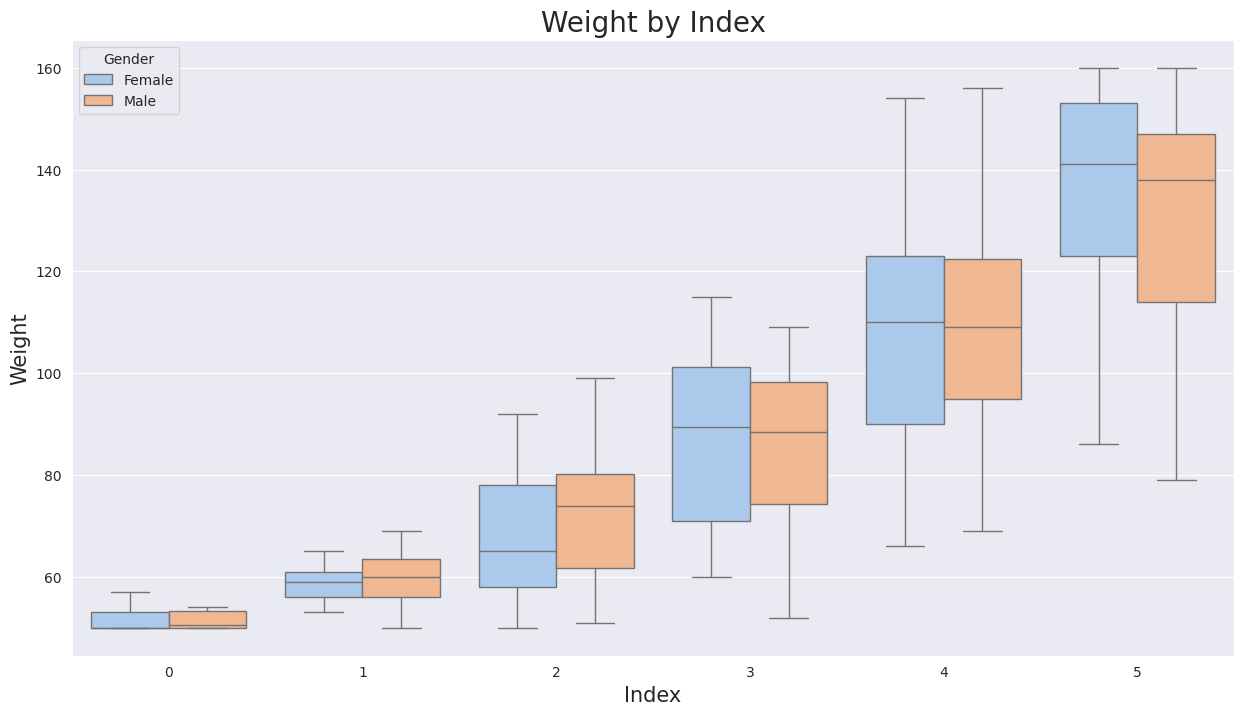

In [16]:
sns.set_style('darkgrid')

f, ax = plt.subplots(figsize = (10,8))
ax = sns.boxplot(data = weight_data, y = weight_data['Weight'], x = weight_data['Gender'], palette = 'pastel')
ax.set_title(label = 'Weight by Gender', size = 20)
plt.ylabel('Weight', size = 15)
plt.xlabel('Gender', size = 15)
plt.show()

f, ax = plt.subplots(figsize = (15,8))
ax = sns.boxplot(data = weight_data, y = weight_data['Weight'], x = weight_data['Index'], hue = 'Gender' ,palette = 'pastel')
ax.set_title(label = 'Weight by Index', size = 20)
plt.ylabel('Weight', size = 15)
plt.xlabel('Index', size = 15)
plt.show()


For the first figure, we can see that there are no outliers in our data. Female has a higher median than Male, but for the 1st and 3rd quartile Male is slightly higher.

And for the second figure, there are also no outliers.

1. For the index 1, we can see that Female has a higher maximum weight than Male
2. For the index 2, Male is more variance than Female. Because the Male's box plot is wider than Female.
3. For the index 3, we can see that all Male quartiles are higher than Female. From that we can get an information that the average for Male in index 3 is higher than Female. we also know that Female IQR > Male IQR
4. For the index 4, same as before we know that Female IQR > male IQR. Maximum and Minimum weight of Male are higher than Female.
5. For the index 5, Male is more variance than Female. Female median is higher than Male.

# 8. Make a histogram by grouping the data with interval 10 start from 50 (Weight)

/tmp/ipython-input-688896372.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(weight_data['Weight'], bins = n_group, color = '#156DF3', kde = False)


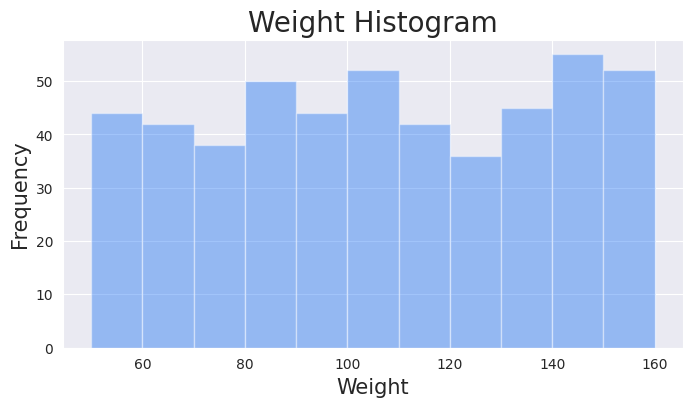

In [17]:
n_group = (max(weight) - min(weight)) // 10

f, ax = plt.subplots(1,1, figsize=(8,4))
ax = sns.distplot(weight_data['Weight'], bins = n_group, color = '#156DF3', kde = False)
plt.ylabel('Frequency', size = 15)
plt.xlabel('Weight', size = 15)
plt.title('Weight Histogram', size = 20)

plt.show()

#9.What's the differences between Histogram and Bar Plot? (minimum 3 differences)

| Histogram | Bar Plot |
|----------|----------|
| Each column represents a group defined by a continuous, quantitative variable. | Each column represents a group defined by a categorical variable. |
| We can figure out skewness from data by plotting a histogram. | Bar plot cannot show skewness of data. |
| Histogram is the best choice for continuous data. | Bar plot is the best choice for categorical data. |
| There are no gaps between bars in a histogram. | There are gaps between bars in a bar plot. |


#**Probability**

In [18]:
import numpy as np
from scipy.stats import binom

# Coin Flip Example
# Probability of getting "Heads"
p_heads = 0.5
p_tails = 0.5

print(f"Probability of getting Heads: {p_heads}")
print(f"Probability of getting Tails: {p_tails}")
print(f"Total probability: {p_heads + p_tails} (should be 1)")

# Dice Roll Example
# Probability of getting a specific number (e.g., 3)
p_dice = 1/6

print(f"Probability of getting a 3 on a dice roll: {p_dice}")

# Sample space and events
sample_space = set([1, 2, 3, 4, 5, 6])
event_A = {3}
event_B = {1, 2, 3, 4}

# Probability of events
p_event_A = len(event_A) / len(sample_space)
p_event_B = len(event_B) / len(sample_space)
p_event_A_and_B = len(event_A.intersection(event_B)) / len(sample_space)
p_event_A_or_B = p_event_A + p_event_B - p_event_A_and_B

print(f"Probability of event A: {p_event_A}")
print(f"Probability of event B: {p_event_B}")
print(f"Probability of A and B: {p_event_A_and_B}")
print(f"Probability of A or B: {p_event_A_or_B}")

# Binomial Distribution
# Probability of getting 2 heads in 5 coin flips
n = 5
k = 2
p = 0.5
binomial_prob = binom.pmf(k, n, p)
print(f"Probability of getting 2 heads in 5 coin flips: {binomial_prob}")

Probability of getting Heads: 0.5
Probability of getting Tails: 0.5
Total probability: 1.0 (should be 1)
Probability of getting a 3 on a dice roll: 0.16666666666666666
Probability of event A: 0.16666666666666666
Probability of event B: 0.6666666666666666
Probability of A and B: 0.16666666666666666
Probability of A or B: 0.6666666666666666
Probability of getting 2 heads in 5 coin flips: 0.31249999999999983


#**Conditional probabilities**

In [19]:
import numpy as np
from scipy.stats import bernoulli, randint

# Defining probability distributions
p_coin = 0.5  # Probability of the coin landing heads
p_dice = 1/6  # Probability of rolling a 3 with a die

# Simulating the experiment
num_trials = 10000
coin_flips = bernoulli.rvs(p_coin, size=num_trials)
dice_rolls = randint.rvs(1, 7, size=num_trials)

# Calculating probabilities
p_A = np.mean(coin_flips)
p_B = np.mean(dice_rolls == 3)
p_A_and_B = np.mean((coin_flips == 1) & (dice_rolls == 3))
p_A_given_B = p_A_and_B / p_B

print(f"P(A) = {p_A:.4f}")
print(f"P(B) = {p_B:.4f}")
print(f"P(A and B) = {p_A_and_B:.4f}")
print(f"P(A|B) = {p_A_given_B:.4f}")

P(A) = 0.5075
P(B) = 0.1668
P(A and B) = 0.0841
P(A|B) = 0.5042
